In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tsai.all import *
import sklearn.preprocessing as pp
import scipy as sp
import scipy.spatial.distance as distance
from sklearn.preprocessing import StandardScaler
from utils import *
from scipy.stats import norm, multivariate_normal, chi2

## Read data - prior signals first

In [21]:
error_not_distracted_list, u_signal_not_distracted_list, x_signal_not_distracted_list = process_signals(error_file= r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSN/e.csv', u_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSN/u.csv', x_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSN/x.csv')
error_distracted_list, u_signal_distracted_list, x_signal_distracted_list         = process_signals(error_file= r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSDCE/e.csv', u_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSDCE/u.csv', x_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSDCE/x.csv')


## Estimate piors' PDFs and Visualize

In [22]:
def fit_gaussian(data):
    """
    Fit a multivariate Gaussian to the data.
    
    Parameters:
    data (array-like): 2D array of shape (n_samples, n_features).
    
    Returns:
    tuple: Mean vector and covariance matrix of the Gaussian.
    """
    mean = np.mean(data, axis=0)
    std_val = np.std(data)
    return mean, std_val


def plot_gaussian_1d_trimmed(data, mean, std_dev, color='red', title='1D Gaussian Fit'):
    """
    Plot a 1D Gaussian distribution on top of the data histogram after removing
    the lowest and highest 10% of the data (outliers).
    
    Parameters:
    data (array-like): The original data used to fit the Gaussian.
    mean (float): Mean of the Gaussian.
    std_dev (float): Standard deviation of the Gaussian.
    color (str): Color for the Gaussian curve.
    """
    # Calculate the 10th and 90th percentiles
    lower_bound = np.percentile(data, 2)
    upper_bound = np.percentile(data, 98)
    
    # Filter the data to remove the lowest and highest 10%
    trimmed_data = data[(data >= lower_bound) & (data <= upper_bound)]
    std_dev = np.std(trimmed_data)
    mean = np.mean(trimmed_data)
    # Create a range of x values for the Gaussian plot
    x = np.linspace(min(trimmed_data), max(trimmed_data), 1000)
    
    # Get the corresponding y values for the Gaussian PDF
    gaussian_pdf = norm.pdf(x, mean, std_dev)
    
    # Plot the trimmed data histogram
    plt.hist(trimmed_data, bins=30, density=True, alpha=0.6, color='blue')
    
    # Plot the Gaussian curve
    plt.plot(x, gaussian_pdf, color=color, lw=2)
    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel('Probability Density')
    plt.show()

def plot_gaussian_1d(data, mean, std_dev, color='red', title='1D Gaussian Fit'):
    """
    Plot a 1D Gaussian distribution on top of the data histogram.
    
    Parameters:
    data (array-like): The original data used to fit the Gaussian.
    mean (float): Mean of the Gaussian.
    std_dev (float): Standard deviation of the Gaussian.
    color (str): Color for the Gaussian curve.
    """
    # Create a range of x values
    x = np.linspace(min(data), max(data), 1000)
    
    # Get the corresponding y values for the Gaussian PDF
    gaussian_pdf = norm.pdf(x, mean, std_dev)

    # Plot the data histogram
    plt.hist(data, bins=30, density=True, alpha=0.6, color='blue')
    
    # Plot the Gaussian curve
    plt.plot(x, gaussian_pdf, color=color, lw=2)
    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel('Probability Density')
    plt.show()


def compute_mahalanobis_z_squared(sample, mean, cov):
    """
    Computes the Mahalanobis distance (equivalent to multivariate z score)
    for a given sample with respect to a multivariate normal distribution.

    Parameters:
    - sample: The data point (1D array) for which to compute the Mahalanobis distance.
    - mean: The mean of the multivariate normal distribution (1D array).
    - cov: The covariance matrix of the multivariate normal distribution (2D array).

    Returns:
    - Mahalanobis distance (score).
    """
    # Create the multivariate normal distribution object
    mvn = multivariate_normal(mean=mean, cov=cov)

    # Compute the Mahalanobis distance
    mahalanobis_distance = mvn.mahalanobis(sample)

    # Return the squared Mahalanobis distance (equivalent to z^2)
    return mahalanobis_distance

## Plot the fitted Gaussians - Example

Change the person index to fit a different subject

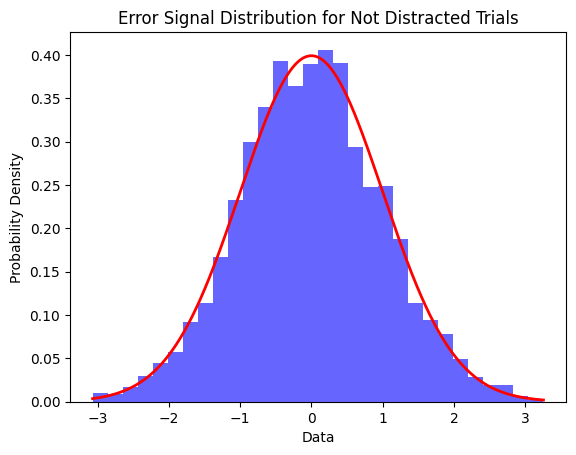

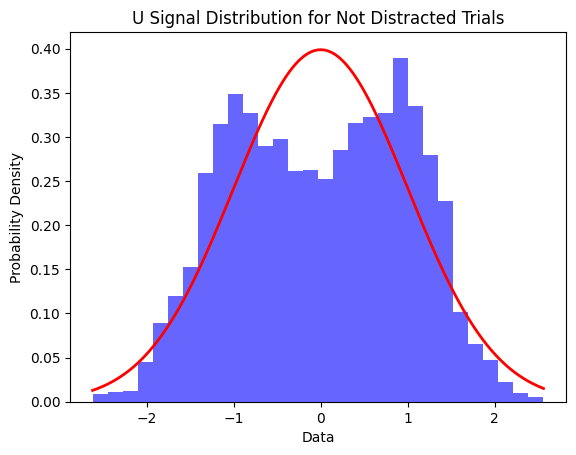

In [23]:
person_idx = 0
idx = person_idx*4 + 0

# combine the entire list in the priors
error_not_distracted = np.concatenate(error_not_distracted_list[person_idx])
u_not_distracted = np.concatenate(u_signal_not_distracted_list[person_idx])

# Fit a Gaussian to the error signal data
error_not_distracted_distribution = fit_gaussian(error_not_distracted)

# Plot the Gaussian on top of the histogram and KDE for distracted data
plot_gaussian_1d(error_not_distracted, error_not_distracted_distribution[0], error_not_distracted_distribution[1], color='red', title='Error Signal Distribution for Not Distracted Trials')

u_not_distracted_distribution = fit_gaussian(u_not_distracted)

# Plot the Gaussian on top of the histogram and KDE for distracted data
plot_gaussian_1d(u_not_distracted, u_not_distracted_distribution[0], u_not_distracted_distribution[1], color='red', title='U Signal Distribution for Not Distracted Trials')

In [24]:
# combine the entire list in the priors
error_not_distracted = np.concatenate(error_not_distracted_list[person_idx])
u_not_distracted = np.concatenate(u_signal_not_distracted_list[person_idx])
x_not_distracted = np.concatenate(x_signal_not_distracted_list[person_idx])

input_not_distracted = np.column_stack((error_not_distracted, u_not_distracted))  # Non-distracted data
cov_input_not_distracted = np.cov(input_not_distracted, rowvar=False)   

mean_not_distracted = np.mean(input_not_distracted, axis=0)
inv_cov_input_not_distracted = sp.linalg.inv(cov_input_not_distracted)
prior_not_distracted_pdf = multivariate_normal(mean = np.mean(input_not_distracted, axis=0), cov = cov_input_not_distracted)

print(f"mean {mean_not_distracted}")
print(f"cov {cov_input_not_distracted}")

mean [7.11965209e-17 9.31083914e-18]
cov [[1.00002083 0.68751437]
 [0.68751437 1.00002083]]


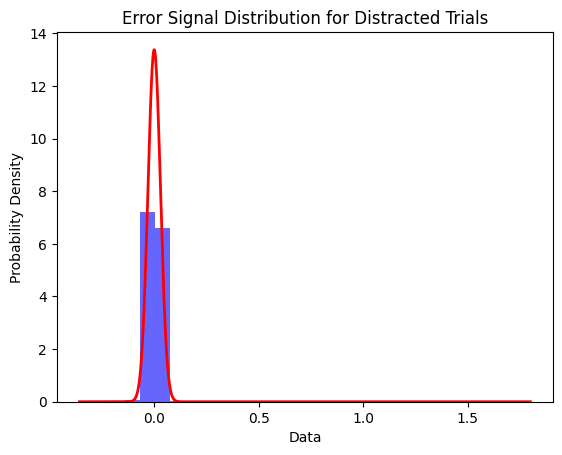

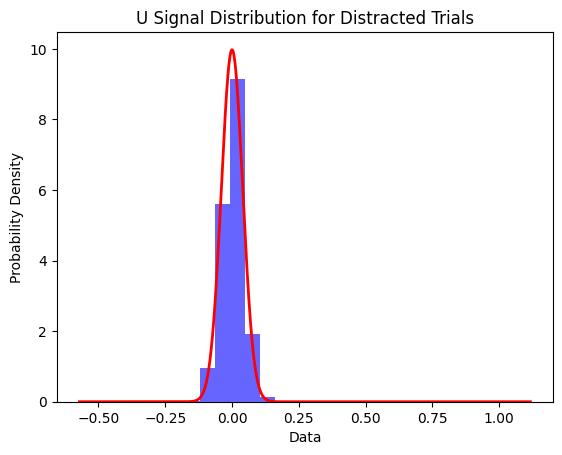

In [25]:
# do the same plots but for the derivative of the error signal and u signal
error_derivative_not_distracted = np.diff(error_not_distracted, axis=0)
u_derivative_not_distracted = np.diff(u_not_distracted, axis=0)
x_derivative_not_distracted = np.diff(x_not_distracted, axis=0)

# Fit a Gaussian to the error signal data
error_derivative_not_distracted_distribution = fit_gaussian(error_derivative_not_distracted)

# Plot the Gaussian on top of the histogram and KDE for distracted data
plot_gaussian_1d(error_derivative_not_distracted, error_derivative_not_distracted_distribution[0], error_derivative_not_distracted_distribution[1], color='red', title='Error Signal Distribution for Distracted Trials')

u_derivative_not_distracted_distribution = fit_gaussian(u_derivative_not_distracted)

# Plot the Gaussian on top of the histogram and KDE for distracted data
plot_gaussian_1d(u_derivative_not_distracted, u_derivative_not_distracted_distribution[0], u_derivative_not_distracted_distribution[1], color='red', title='U Signal Distribution for Distracted Trials')

## Plot distracted data

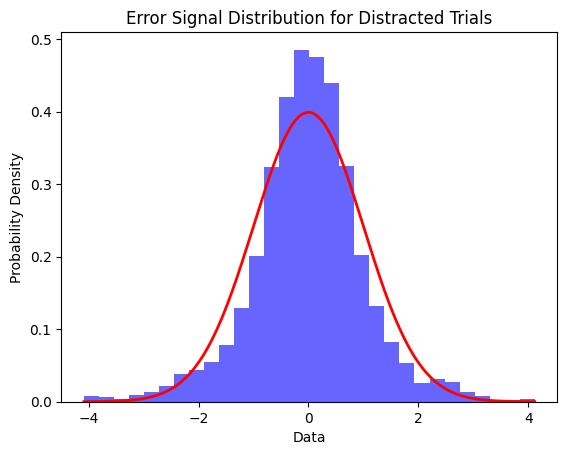

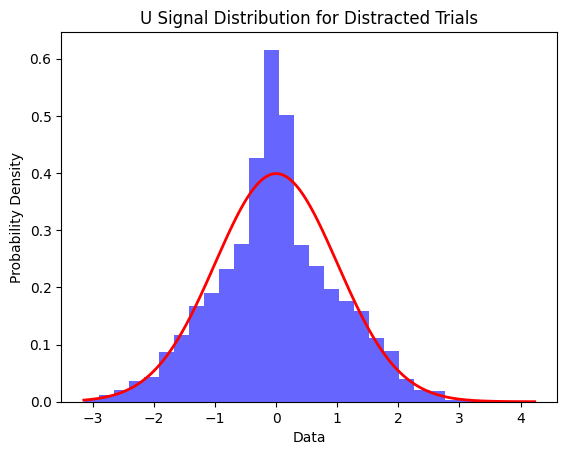

In [26]:
# combine the entire list in the priors
error_distracted = np.concatenate(error_distracted_list[person_idx])
u_distracted = np.concatenate(u_signal_distracted_list[person_idx])
x_distracted = np.concatenate(x_signal_distracted_list[person_idx])

# Fit a Gaussian to the error signal data
error_distracted_distribution = fit_gaussian(error_distracted)

# Plot the Gaussian on top of the histogram and KDE for distracted data
plot_gaussian_1d(error_distracted, error_distracted_distribution[0], error_distracted_distribution[1], color='red', title='Error Signal Distribution for Distracted Trials')

u_distracted_distribution = fit_gaussian(u_distracted)

# Plot the Gaussian on top of the histogram and KDE for distracted data
plot_gaussian_1d(u_distracted, u_distracted_distribution[0], u_distracted_distribution[1], color='red', title='U Signal Distribution for Distracted Trials')

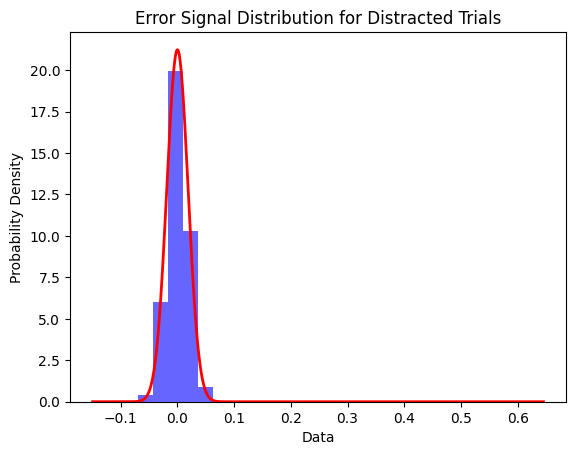

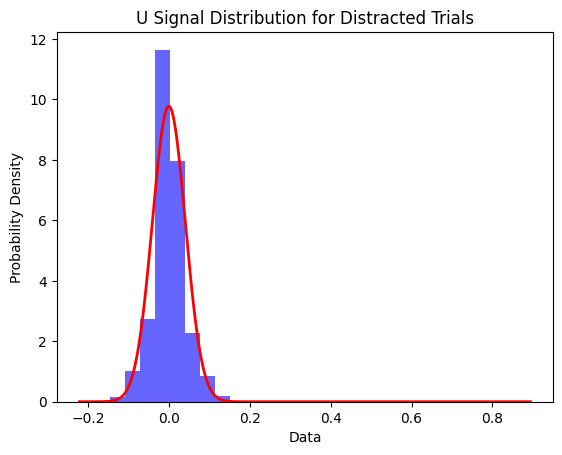

In [27]:
# combine the entire list in the priors
error_derivative_distracted = np.diff(error_distracted, axis=0)
u_derivative_distracted = np.diff(u_distracted, axis=0)
x_derivative_distracted = np.diff(x_distracted, axis=0)

# Fit a Gaussian to the error signal data
error_derivative_distracted_distribution = fit_gaussian(error_derivative_distracted)

# Plot the Gaussian on top of the histogram and KDE for distracted data
plot_gaussian_1d(error_derivative_distracted, error_derivative_distracted_distribution[0], error_derivative_distracted_distribution[1], color='red', title='Error Signal Distribution for Distracted Trials')

u_derivative_distracted_distribution = fit_gaussian(u_derivative_distracted)

# Plot the Gaussian on top of the histogram and KDE for distracted data
plot_gaussian_1d(u_derivative_distracted, u_derivative_distracted_distribution[0], u_derivative_distracted_distribution[1], color='red', title='U Signal Distribution for Distracted Trials')

## Read the signals to be tested

In [28]:
error_signal_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSDPE/e.csv', delimiter=',')
tc_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSDPE/mdist.csv', delimiter=',')
u_signal_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSDPE/u.csv', delimiter=',')
x_signal_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSDPE/x.csv', delimiter=',')

print(f"{error_signal_test.shape=}; {tc_test.shape=}; {u_signal_test.shape=}")    

error_signal_test.shape=(12000, 40); tc_test.shape=(12000, 40); u_signal_test.shape=(12000, 40)


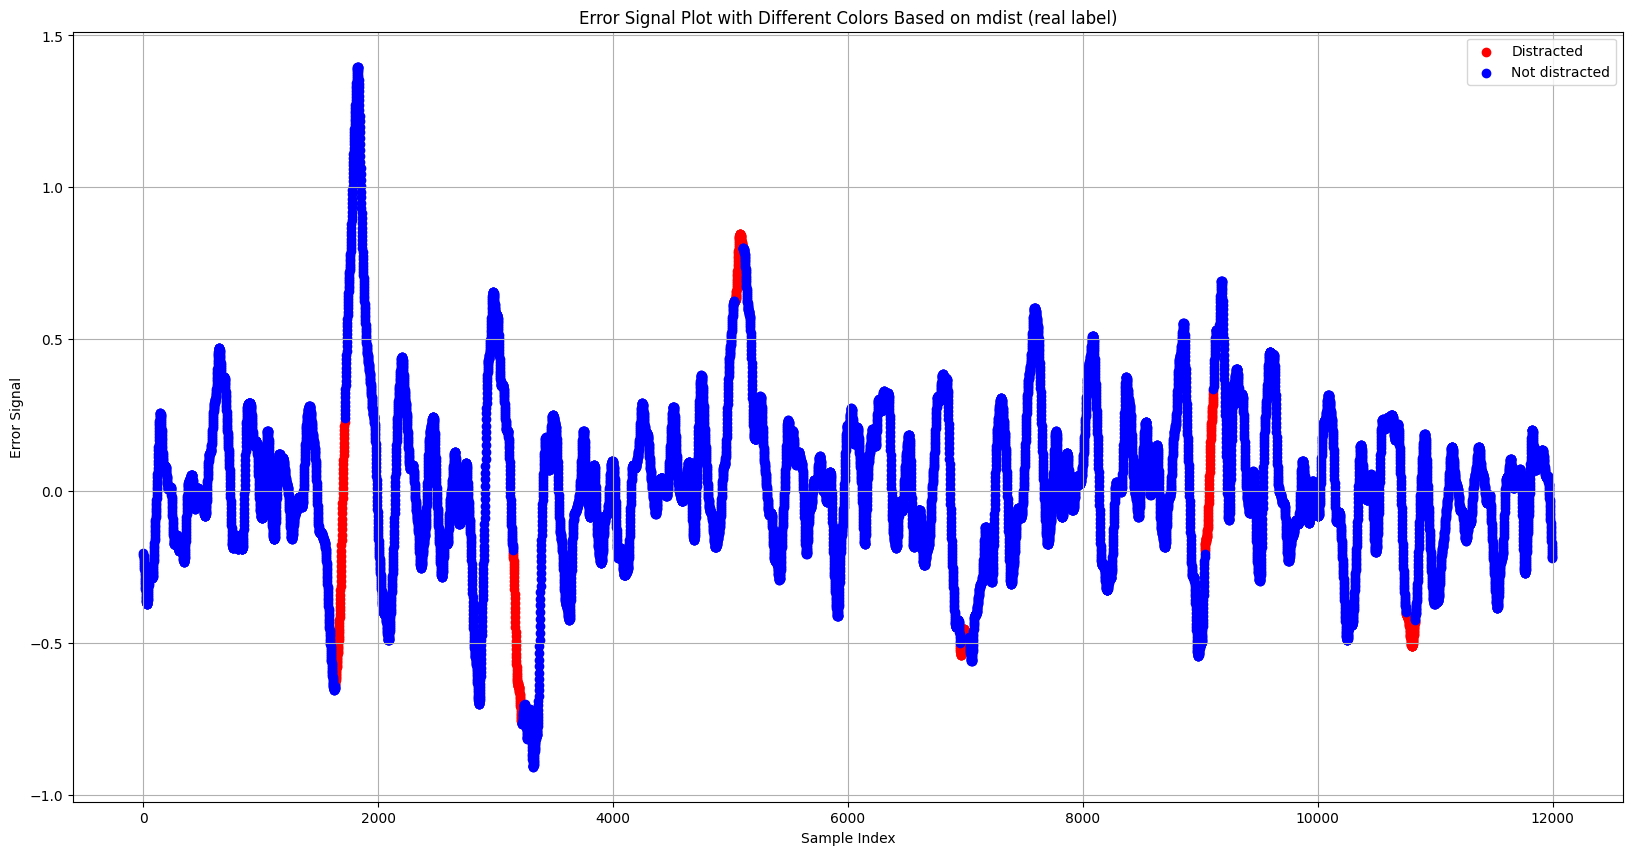

In [29]:
error_plot = error_signal_test[:, idx]
tc_test_col = tc_test[:, idx]

# Create a mask for tc_test == 1 and tc_test == 0
mask_1 = tc_test_col == 1
mask_0 = tc_test_col == 0

# Plotting
plt.figure(figsize=(20, 10))
plt.scatter(np.arange(len(error_plot))[mask_1], error_plot[mask_1], color='red', label='Distracted')
plt.scatter(np.arange(len(error_plot))[mask_0], error_plot[mask_0], color='blue', label='Not distracted')
plt.grid()
# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Error Signal')
plt.title('Error Signal Plot with Different Colors Based on mdist (real label)')
plt.legend()
plt.show()

mean.shape=(2,); cov.shape=(2, 2)


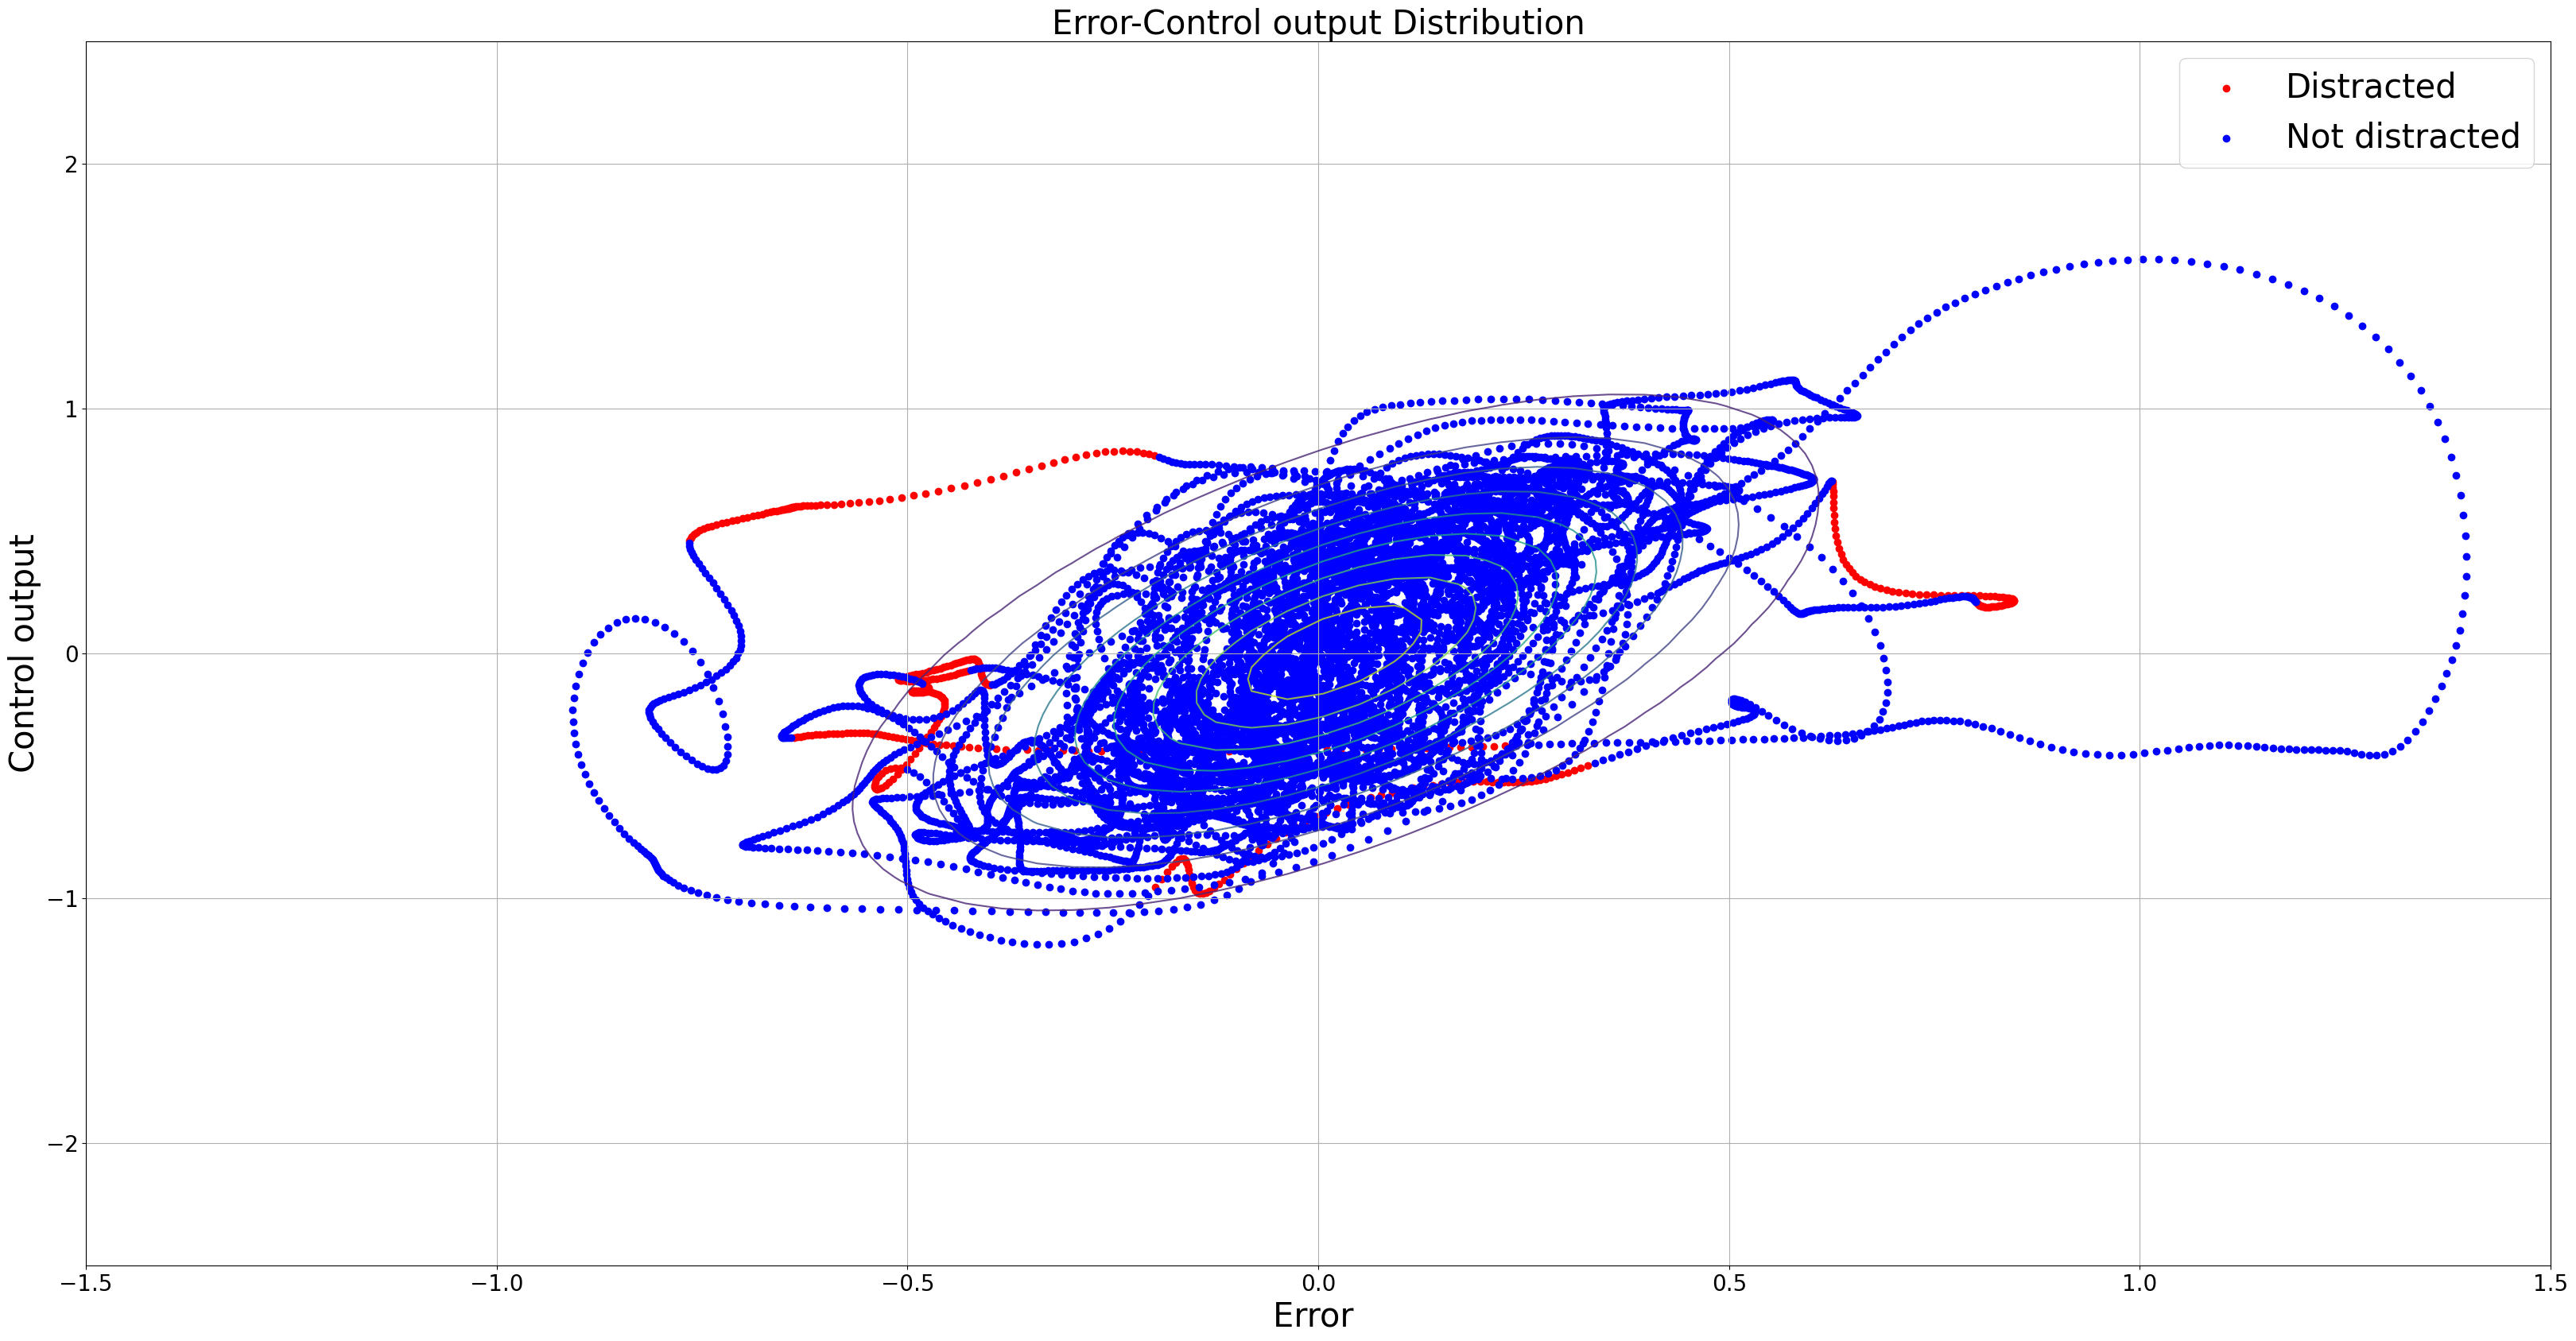

In [30]:
def plot_gaussian_2d(data, mean, cov, title='Gaussian 2D Plot'):
    """ Plot a 2D Gaussian distribution on top of the scatter plot.
    
    Args:
        data (numpy.ndarray): The input data used for fitting the Gaussian.
        mean (numpy.ndarray): The mean of the Gaussian.
        cov (numpy.ndarray): The covariance matrix of the Gaussian.
        title (str): The title of the plot.
    """
    # Create a grid of points
    x = np.linspace(np.min(data[:, 0]) - 1, np.max(data[:, 0]) + 1, 100)
    y = np.linspace(np.min(data[:, 1]) - 1, np.max(data[:, 1]) + 1, 100)
    X, Y = np.meshgrid(x, y)
    
    # Calculate the Gaussian PDF for each point on the grid
    pos = np.dstack((X, Y))
    Z = multivariate_normal.pdf(pos, mean=mean, cov=cov)
    
    # Plot the contour lines
    plt.contour(X, Y, Z, levels=10, cmap='viridis', alpha=0.8)
    plt.title(title, fontsize=30)

# plot error signal and u signal in 2D
plt.figure(figsize=(40, 20))
plt.scatter(error_plot[mask_1], u_signal_test[:, idx][mask_1], color='red', label='Distracted')
plt.scatter(error_plot[mask_0], u_signal_test[:, idx][mask_0], color='blue', label='Not distracted')

# place xlim and ylim
plt.xlim(-1.5, 1.5)
plt.ylim(-2.5, 2.5)

# increase font size of the axes numbers
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
# Add labels and title
# increase the font size of the labels and title
plt.xlabel('Error ', fontsize=30)
plt.ylabel('Control output', fontsize=30)
plt.title('Error vs control output 2D Contour Plot', fontsize=50)
plt.legend(fontsize=30)
# plt.show()

# fit and plot a 2d gaussian on top of the previous figure
# Fit a Gaussian to the error-u signal data
data = np.column_stack((error_plot[mask_0], u_signal_test[:, idx][mask_0]))
mean, cov = fit_gaussian(data)
cov = np.cov(data, rowvar=False)

print(f"{mean.shape=}; {cov.shape=}")

# # plot the gaussian on top of the previous figure
plot_gaussian_2d(data, mean, cov, title='Error-Control output Distribution')

points = np.column_stack((error_plot, u_signal_test[:, idx]))
arrows_mask = np.array(mask_0 | mask_1)

# Calculate the direction for arrows
dx = np.diff(points[arrows_mask, 0])
dy = np.diff(points[arrows_mask, 1])

# Start plotting arrows from each point, except the last one
arrow_start_x = points[arrows_mask][:-1, 0]
arrow_start_y = points[arrows_mask][:-1, 1]
# plt.quiver(arrow_start_x, arrow_start_y, dx, dy, color='green', angles='xy', scale_units='xy', scale=2, width=0.002)
plt.show()

## Test data 

In [31]:
data_test  = np.stack((error_signal_test, u_signal_test), axis=1)
input_not_distracted = np.column_stack((error_not_distracted, u_not_distracted))  # Non-distracted data
cov_input_not_distracted = np.cov(input_not_distracted, rowvar=False)

print(f"{data_test.shape=}")

data_test.shape=(12000, 2, 40)


In [32]:
mean_not_distracted = np.mean(input_not_distracted, axis=0)
inv_cov_input_not_distracted = sp.linalg.inv(cov_input_not_distracted)
prior_not_distracted_pdf = multivariate_normal(mean = np.mean(input_not_distracted, axis=0), cov = cov_input_not_distracted)

tc_test_person = tc_test[:, idx]
data_test_person = data_test[:, :,idx]

print(f"{mean_not_distracted}")
print(f"{inv_cov_input_not_distracted}")

distances_from_prior = [distance.mahalanobis(sample, mean_not_distracted, inv_cov_input_not_distracted) for sample in data_test_person]
distance_other = np.loadtxt(r"/home/mihai/Thesis/distances_2_0.csv", delimiter=',')

[7.11965209e-17 9.31083914e-18]
[[ 1.896257   -1.30367677]
 [-1.30367677  1.896257  ]]


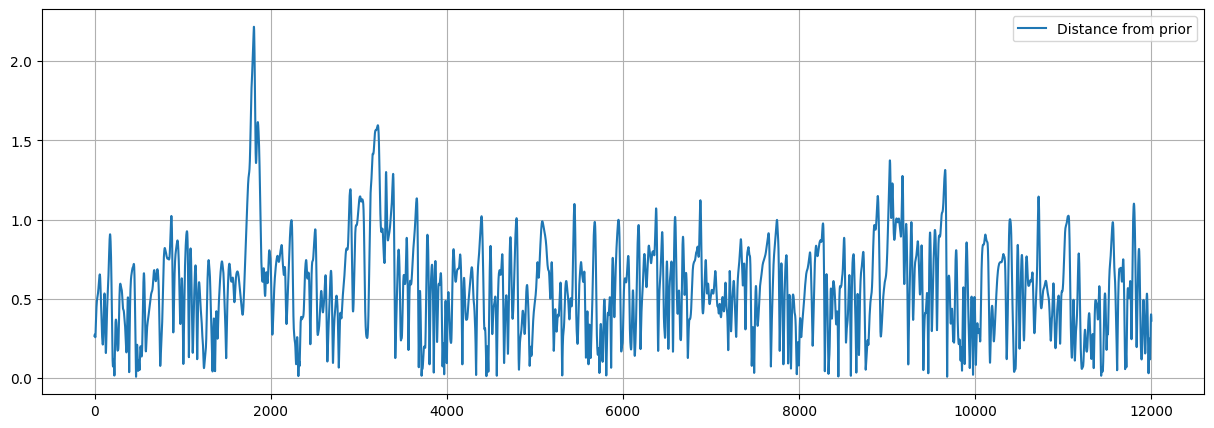

In [42]:
# plt.plot(distances_from_prior, label='Distance from prior')
# plt.plot(distance_other, label='Distance from other')
plt.figure(figsize=(15, 5))
plt.plot(distances_from_prior, label='Distance from prior')
plt.legend()
plt.grid()
plt.show()

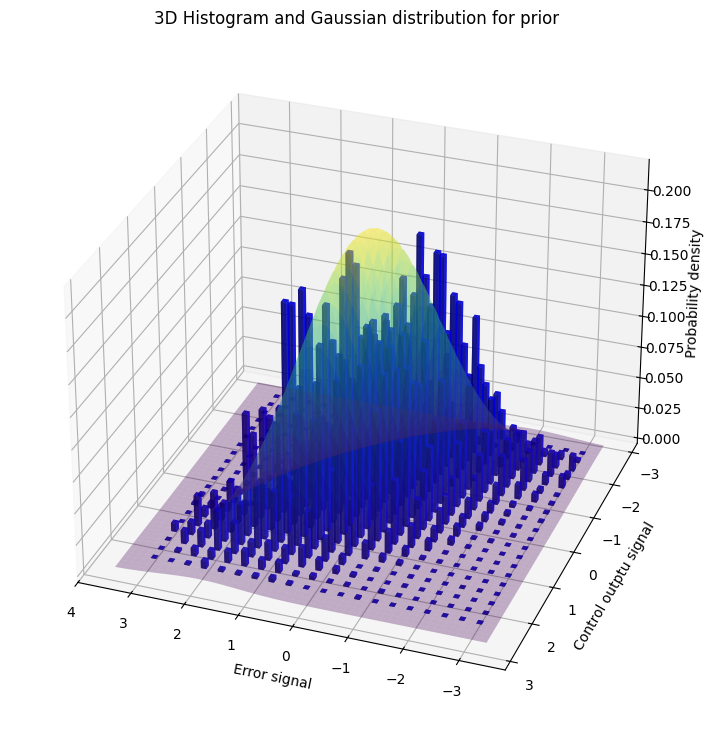

In [34]:
def plot_gaussian_3d(ax, mean, cov, x_range, y_range, title='Gaussian 3D Plot'):
    """ Plot a 3D Gaussian distribution.
    
    Args:
        ax: The 3D axis to plot on.
        mean (numpy.ndarray): Mean of the Gaussian.
        cov (numpy.ndarray): Covariance matrix of the Gaussian.
        x_range (tuple): Range for the x-axis.
        y_range (tuple): Range for the y-axis.
        title (str): Title of the plot.
    """
    x = np.linspace(x_range[0]-0.25, x_range[1]+0.25, 200)
    y = np.linspace(y_range[0]-0.25, y_range[1]+0.25, 200)
    X, Y = np.meshgrid(x, y)
    
    pos = np.dstack((X, Y))
    Z = multivariate_normal.pdf(pos, mean=mean, cov=cov)

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)


# Create a 3D plot
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

# Define the ranges for the Gaussian plot
x_range = (np.min(error_not_distracted), np.max(error_not_distracted))
y_range = (np.min(u_not_distracted), np.max(u_not_distracted))

# Create the 3D histogram
hist, xedges, yedges = np.histogram2d(error_not_distracted, u_not_distracted, bins=20, density=True)

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0  # Start all bars from z=0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.1 * np.ones_like(zpos)  # Width of the bars
dz = hist.ravel()  # Height of the bars (frequency)

# Create the 3D bar plot
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', alpha=0.7, color='blue')

# Plot the Gaussian surface
plot_gaussian_3d(ax, mean_not_distracted, cov_input_not_distracted, x_range, y_range)

# Add labels and title
ax.set_xlabel('Error signal')
ax.set_ylabel('Control outptu signal')
ax.set_zlabel('Probability density')
ax.set_title('3D Histogram and Gaussian distribution for prior')
# Rotate the view for better visibility
ax.view_init(elev=30, azim=110)  # Adjust these values for different perspectives

plt.show()

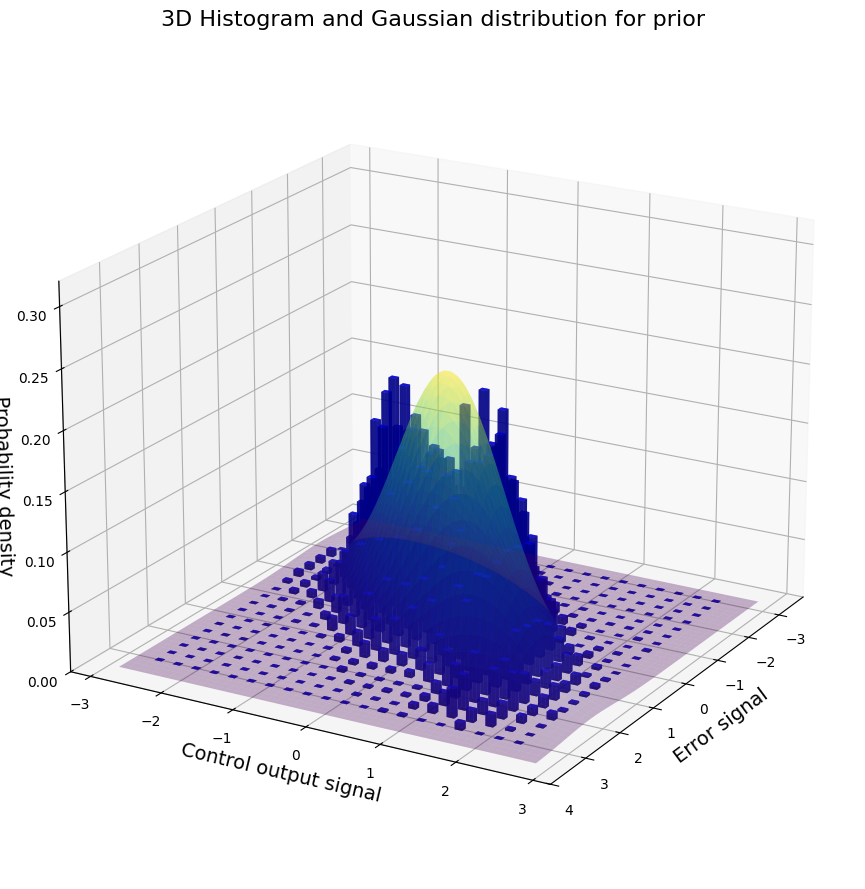

In [35]:
def plot_gaussian_3d(ax, mean, cov, x_range, y_range, title='Gaussian 3D Plot'):
    """ Plot a 3D Gaussian distribution.
    
    Args:
        ax: The 3D axis to plot on.
        mean (numpy.ndarray): Mean of the Gaussian.
        cov (numpy.ndarray): Covariance matrix of the Gaussian.
        x_range (tuple): Range for the x-axis.
        y_range (tuple): Range for the y-axis.
        title (str): Title of the plot.
    """
    x = np.linspace(x_range[0]-0.25, x_range[1]+0.25, 200)
    y = np.linspace(y_range[0]-0.25, y_range[1]+0.25, 200)
    X, Y = np.meshgrid(x, y)
    
    pos = np.dstack((X, Y))
    Z = multivariate_normal.pdf(pos, mean=mean, cov=cov)

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)


# Create a 3D plot
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

# Define the ranges for the Gaussian plot
x_range = (np.min(error_not_distracted), np.max(error_not_distracted))
y_range = (np.min(u_not_distracted), np.max(u_not_distracted))

# Create the 3D histogram
hist, xedges, yedges = np.histogram2d(error_not_distracted, u_not_distracted, bins=20, density=True)

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0  # Start all bars from z=0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.1 * np.ones_like(zpos)  # Width of the bars
dz = hist.ravel()  # Height of the bars (frequency)

# Create the 3D bar plot
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', alpha=0.7, color='blue')

# Plot the Gaussian surface
plot_gaussian_3d(ax, mean_not_distracted, cov_input_not_distracted, x_range, y_range)

# Add labels and title
ax.set_xlabel('Error signal', fontsize=14)
ax.set_ylabel('Control output signal', fontsize=14)
ax.set_zlabel('Probability density', fontsize=14)

# Move the z-axis label to a different position
ax.zaxis.set_label_coords(1.1, 0.5, 0.5)  # Adjust this tuple to reposition the z label

# Set the title
ax.set_title('3D Histogram and Gaussian distribution for prior', fontsize=16)

# Set z-axis limits to improve label visibility
ax.set_zlim(0, np.max(dz) * 1.5)  # Increased limit

# Rotate the view for better visibility
ax.view_init(elev=20, azim=30)  # Adjust these values for different perspectives

# Adjust layout
plt.tight_layout()

plt.show()

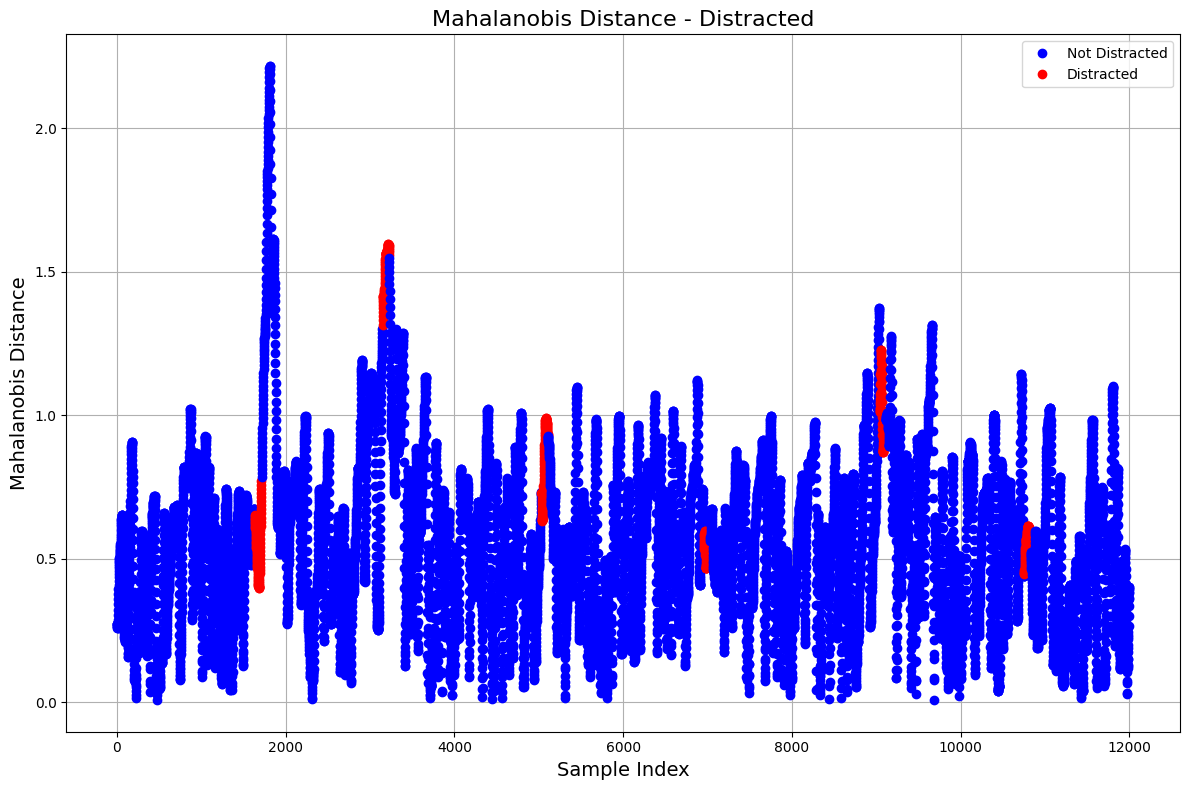

In [36]:
# Set up a larger single plot
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))  # Larger figure size for a single plot

# Create lists to keep track of plots for legend
distract_legend_plots = []
not_distract_legend_plots = []

#  Plot Mahalanobis distance values for distracted data
for i, (pdf_value, tc_value) in enumerate(zip(distances_from_prior, tc_test_person)):
    color = 'b' if tc_value == 0 else 'r'  # Color coding: blue for 'not distracted', red for 'distracted'
    plot = ax1.plot(i, pdf_value, marker='o', linestyle='', color=color)
    
    # Add plot for legend (only once per color)
    if tc_value == 0 and not distract_legend_plots:
        distract_legend_plots.append(plot[0])
    elif tc_value == 1 and len(distract_legend_plots) < 2:
        distract_legend_plots.append(plot[0])

# Set titles and labels for the plot
ax1.set_title("Mahalanobis Distance - Distracted", fontsize=16)
ax1.set_xlabel("Sample Index", fontsize=14)
ax1.set_ylabel("Mahalanobis Distance", fontsize=14)
ax1.grid(True)

# Adding a legend
ax1.legend(distract_legend_plots, ['Not Distracted', 'Distracted'], loc='best')

# Show the plot
plt.tight_layout()
plt.show()

## Plot the time traces

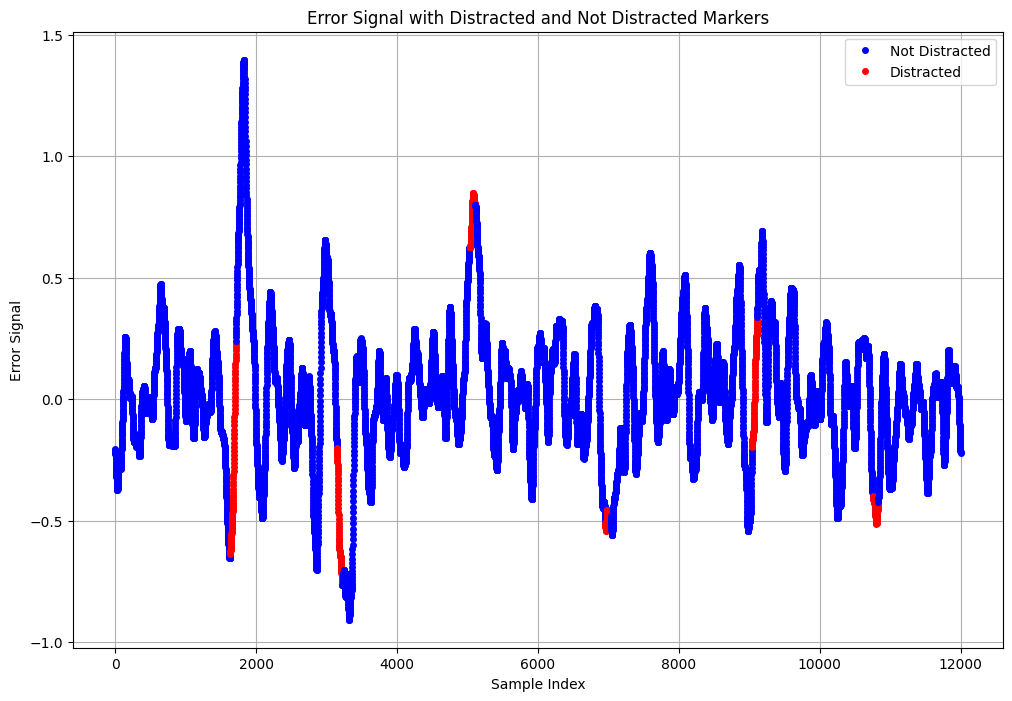

In [37]:
# Create a larger figure
fig, ax2 = plt.subplots(figsize=(12, 8))  # Increase the size of the figure

# Plot the error signal for the first column with reduced line width and alpha for visibility
ax2.plot(error_signal_test[:, idx], label="Error Signal", color='k', alpha=0.5)

# Initialize lists to handle the legend plots
not_distract_legend_plots = []

# Iterate through the distances and tc labels
for i, (pdf_value, tc_value) in enumerate(zip(error_signal_test[:, idx], tc_test_person)):
    # Set color based on tc_value
    color = 'b' if tc_value == 0 else 'r'
    # Plot each point with smaller marker size
    plot = ax2.plot(i, pdf_value, marker='o', linestyle='', color=color, markersize=4)  # Reduce marker size

    # Add to legend only once for each class (0 and 1)
    if tc_value == 0 and not not_distract_legend_plots:
        not_distract_legend_plots.append(plot[0])
    elif tc_value == 1 and len(not_distract_legend_plots) == 1:
        not_distract_legend_plots.append(plot[0])

# Add the legend to indicate the meaning of the colors
ax2.legend(not_distract_legend_plots, ['Not Distracted', 'Distracted'], loc='best')

# Add grid and labels
plt.grid(True)
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Error Signal")
ax2.set_title("Error Signal with Distracted and Not Distracted Markers")

# Show the plot
plt.show()


## Detect distraction based on Mahalanobis distance

In [38]:
def detect_distractions_mahalanobis_aux(tc_test, data_test, mean_not_distracted, inv_cov_input_not_distracted):
    column_index = 8
    num_columns = tc_test.shape[1]  # Get the number of columns
    # for column_index in range(num_columns):
    tc_test_column = tc_test[:, column_index]
    data_test_column = data_test[:, :, column_index]
    distractions_detected, detected_distracted, distances_distracted = detect_distractions_mahalanobis(data_test_column, mean_not_distracted, inv_cov_input_not_distracted)
    
    return distractions_detected, detected_distracted, distances_distracted, tc_test_column
        # compute some performance metrics
        

distractions_detected, detected_distracted, distances_distracted, tc_test_column = detect_distractions_mahalanobis_aux(tc_test, data_test, mean_not_distracted, inv_cov_input_not_distracted)

NameError: name 'detect_distractions_mahalanobis' is not defined

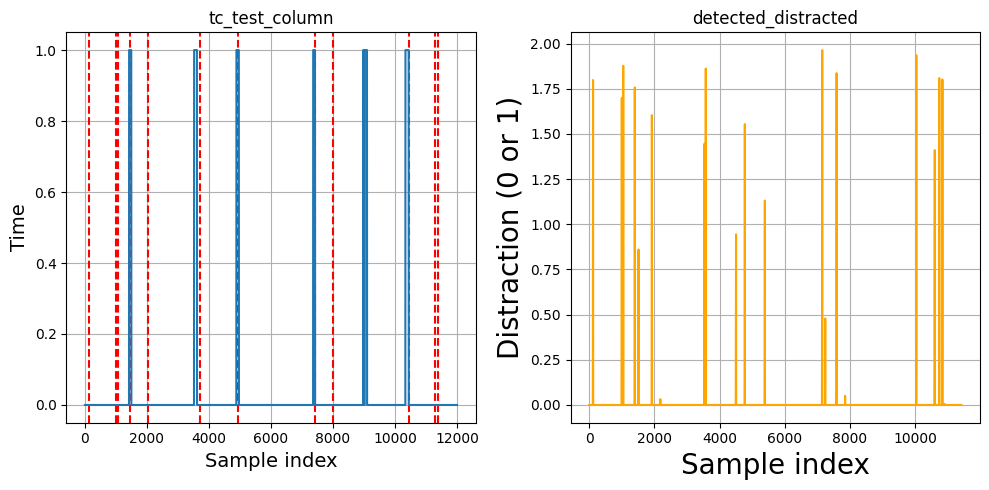

In [ ]:
# Plotting the two side by side
plt.figure(figsize=(10, 5))

# Plot tc_test_column
plt.subplot(1, 2, 1)
# add as vertical lines the detected distractions
for i in range(len(distractions_detected)):
    plt.axvline(x=distractions_detected[i], color='red', linestyle='--')
plt.grid()
plt.plot(tc_test_column, label="tc_test_column")
plt.title("tc_test_column")
plt.xlabel("Sample index", fontsize=14)
plt.ylabel("Time", fontsize=14)

# Plot detected_distracted
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(detected_distracted, label="detected_distracted", color='orange')
plt.title("detected_distracted")
plt.xlabel("Sample index", fontsize=20)
plt.ylabel("Distraction (0 or 1)", fontsize=20)

plt.tight_layout()
plt.show()

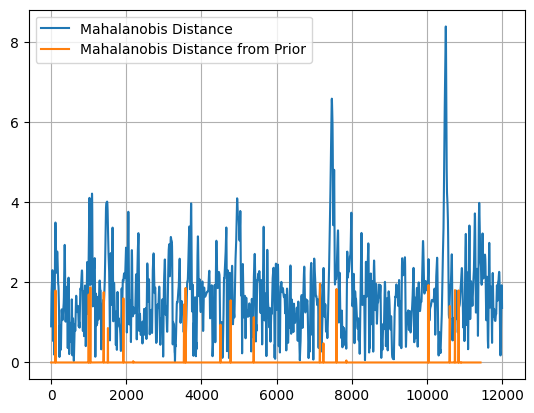

In [ ]:
plt.plot(distances_distracted, label="Mahalanobis Distance")
plt.plot(detected_distracted, label="Mahalanobis Distance from Prior")
plt.legend()
plt.grid()
plt.show()

## For the performance metric calculation:
1. if there is a indeed distracted behaviour during the alarm being triggered, count as a good detection
2. no distracted samples around the alarm being triggered ==> consider it false alarm
3. if the person is distracted for 1 second without the alarm being triggered ==> count it as a missed detection


## Use also the signal derivatives

In [ ]:
# learn prior
input_not_distracted_derivative = np.column_stack((error_not_distracted[1:], u_not_distracted[1:], x_not_distracted[1:],
                                        error_derivative_not_distracted, u_derivative_not_distracted, x_derivative_not_distracted))  # Non-distracted data
cov_input_not_distracted_derivative = np.cov(input_not_distracted_derivative, rowvar=False)


mean_not_distracted_derivative_derivative= np.mean(input_not_distracted_derivative, axis=0)
inv_cov_input_not_distracted_derivative = sp.linalg.inv(cov_input_not_distracted_derivative)
prior_not_distracted_pdf = multivariate_normal(mean = np.mean(input_not_distracted_derivative, axis=0), cov = cov_input_not_distracted_derivative)


error_derivative_signal_test = np.diff(error_signal_test, axis=0)
u_derivative_signal_test = np.diff(u_signal_test, axis=0)
x_derivative_test = np.diff(x_signal_test, axis=0)

data_test_derivative = np.stack((error_signal_test[1:,:], u_signal_test[1:,:],x_signal_test[1:,:], 
                                 error_derivative_signal_test, u_derivative_signal_test, x_derivative_test), axis=1)
                    
tc_test_person_derivative = tc_test[:, idx]
data_test_person_derivative = data_test_derivative[:, :,idx]

In [ ]:
distances_from_prior_derivatives = [distance.mahalanobis(sample, mean_not_distracted_derivative_derivative, inv_cov_input_not_distracted_derivative) for sample in data_test_person_derivative]

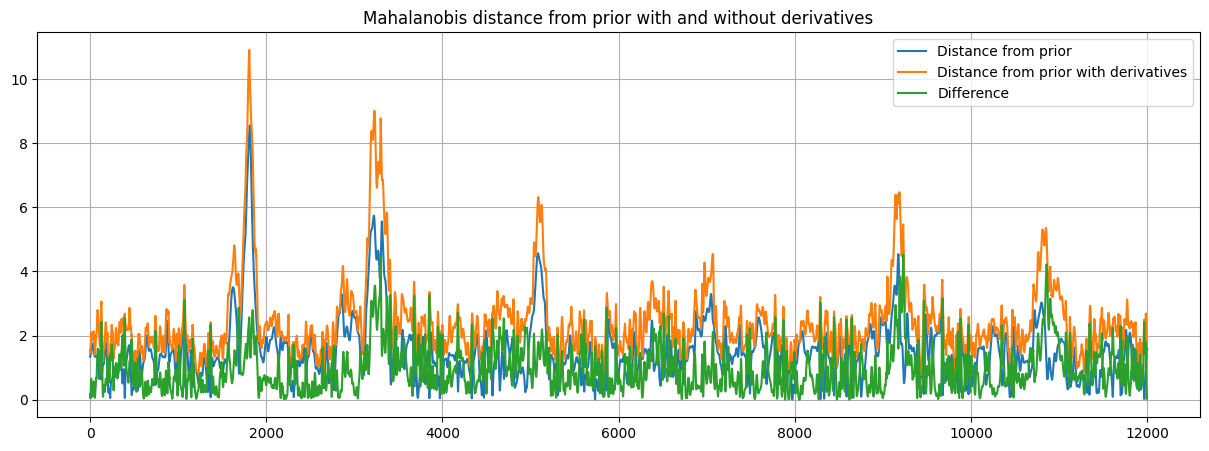

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(distances_from_prior, label='Distance from prior')
plt.plot(distances_from_prior_derivatives, label='Distance from prior with derivatives')
plt.plot(abs(np.array(distances_from_prior)[1:]-np.array(distances_from_prior_derivatives)), label='Difference')
plt.legend()
plt.title("Mahalanobis distance from prior with and without derivatives")
plt.grid()
plt.show()

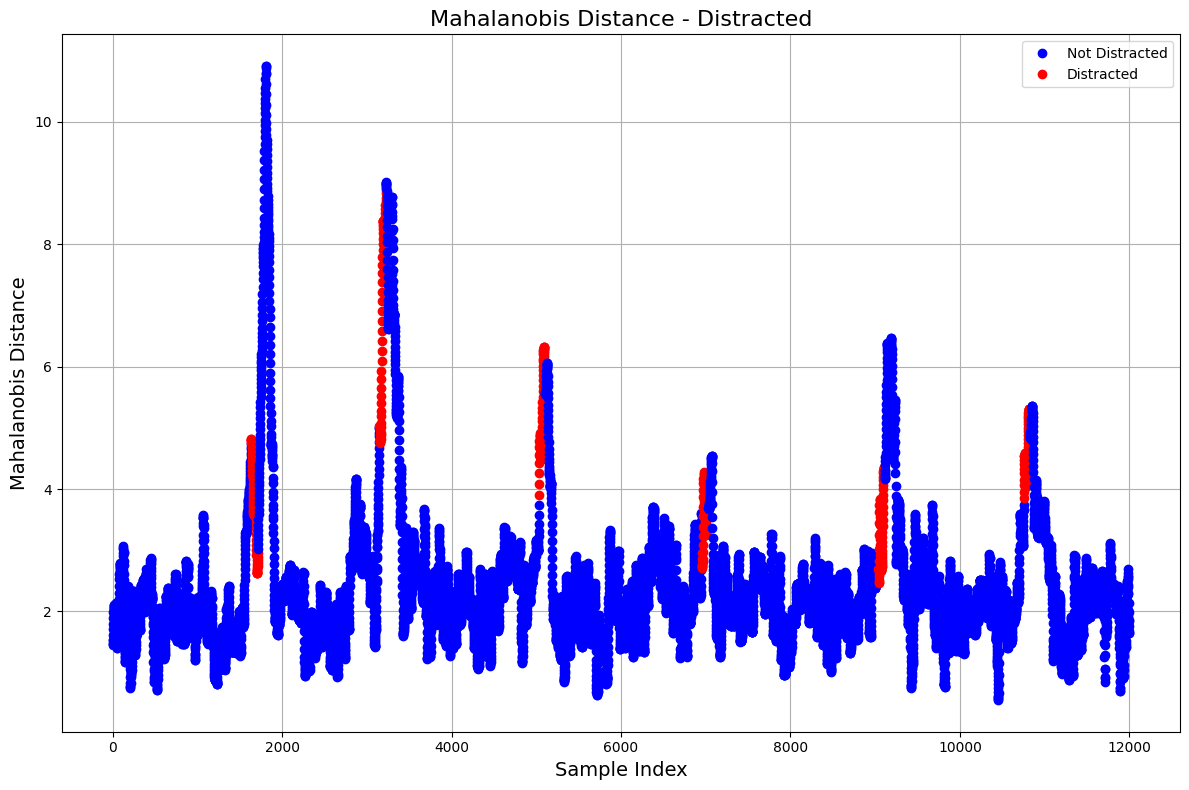

In [ ]:
# Set up a larger single plot
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))  # Larger figure size for a single plot

# Create lists to keep track of plots for legend
distract_legend_plots = []
not_distract_legend_plots = []

#  Plot Mahalanobis distance values for distracted data
for i, (pdf_value, tc_value) in enumerate(zip(distances_from_prior_derivatives, tc_test_person)):
    color = 'b' if tc_value == 0 else 'r'  # Color coding: blue for 'not distracted', red for 'distracted'
    plot = ax1.plot(i, pdf_value, marker='o', linestyle='', color=color)
    
    # Add plot for legend (only once per color)
    if tc_value == 0 and not distract_legend_plots:
        distract_legend_plots.append(plot[0])
    elif tc_value == 1 and len(distract_legend_plots) < 2:
        distract_legend_plots.append(plot[0])

# Set titles and labels for the plot
ax1.set_title("Mahalanobis Distance - Distracted", fontsize=16)
ax1.set_xlabel("Sample Index", fontsize=14)
ax1.set_ylabel("Mahalanobis Distance", fontsize=14)
ax1.grid(True)

# Adding a legend
ax1.legend(distract_legend_plots, ['Not Distracted', 'Distracted'], loc='best')

# Show the plot
plt.tight_layout()
plt.show()